## Power balanced projection methods for time-continuous dynamic simulations

In [17]:
# Imports
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import rpm_module as rpm
import sympy as sp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RPM solver for PHS conservative systems

In [18]:
"""
def gradients(x):
    grad1 = x[0] / C0
    grad2 = x[1] * L0
    return np.array((grad1, grad2))

def hessian(x):
    NPoints = x.shape[1]
    hessian = np.zeros((2,2,NPoints))
    hessian[0,0,:] = np.ones(NPoints) / C0 
    hessian[1,1,:] = np.ones(NPoints) * L0
    return hessian"""

'\ndef gradients(x):\n    grad1 = x[0] / C0\n    grad2 = x[1] * L0\n    return np.array((grad1, grad2))\n\ndef hessian(x):\n    NPoints = x.shape[1]\n    hessian = np.zeros((2,2,NPoints))\n    hessian[0,0,:] = np.ones(NPoints) / C0 \n    hessian[1,1,:] = np.ones(NPoints) * L0\n    return hessian'

In [19]:
#### Build a phs structure ####
# Interconnexion matrix
S = np.array([[0, 0, -1, -1], 
              [0, 0, 0, -1],
              [1, 0, 0, 0],
              [1, 1, 0, 0]])

# Symbols declaration
q1, q2, phi, C1, C2, L0 = sp.symbols('q1, q2, phi, C_1, C_2, L_0', real=True)
# States variables
states = [q1, q2, phi]
# Additional parameters
parameters = [C1, C2, L0]
# Hamiltonian expression
def hamiltonian(q1, q2, phi):
    return (q1)**2 / (2*C1) + (q2)**2 / (2*C2) + phi**2 / (2*L0)
H = hamiltonian(*states)

# Number of constraints
n_constraints  =1

# Create dictionnary containing the structure
phs_struct = rpm.struct.build_struct_dict(S, H, states, parameters, n_constraints)

##### Save to a file #####
filename = 'models/test.pickle'
rpm.struct.store(phs_struct, filename)

In [20]:
# Load a phs stucture
filename = "models/test.pickle"
phs_struct = rpm.struct.load(filename)

# Replace parameters of the hamiltonian with their desired values
parameters = phs_struct["Parameters"]
print(parameters)
C1 = parameters[0]
C2 = parameters[1]
L0 = parameters[2] 
phs_struct["H"] = phs_struct["H"].subs([(C1, 1), (C2, 1), (L0, 1)])
phs_struct["H"]

[C_1, C_2, L_0]


phi**2/2 + q1**2/2 + q2**2/2

In [21]:
#Solver parameters
p_order = 1
k_order  = 2
sr = 1
stepSize = 1/sr
quadOrder = 50
epsilon = 10**(-15)
maxIter = 10000

In [22]:
solver = rpm.RPMSolverPHS(phs_struct, p_order, k_order, stepSize,
    quadOrder, epsilon, maxIter)

In [23]:
solver.n_state

3

(100, 3)


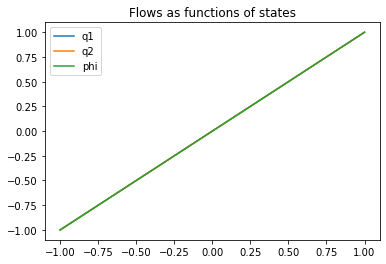

In [24]:
x = np.array([np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)]).T
rpm.hp.plot_gradients(solver, np.linspace(-1, 1, 100), ["q1", "q2", "phi"])

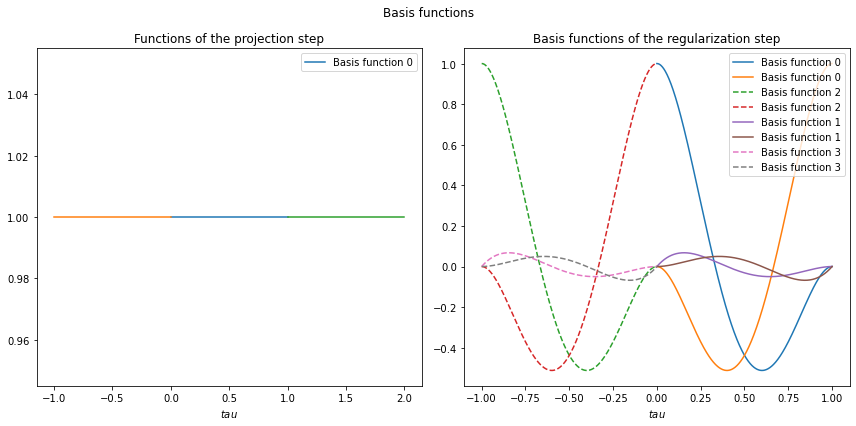

In [25]:
rpm.hp.plot_basis(solver)

In [26]:
init = np.zeros(len(states), dtype= np.float64)
init[0] = 1
duration = 3
t = np.linspace(0, duration, int(duration/stepSize))
x, dx_proj, l_mults, dx_regul = solver.simulate(init, duration)

Mean number of NR iterations : 1.0
Max number of NR iterations : 1.0,              step index : 0


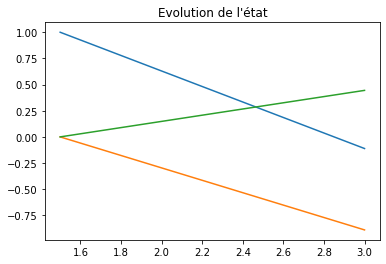

In [27]:
plt.figure()
plt.title("Evolution de l'état")
plt.plot(t[1:],x)

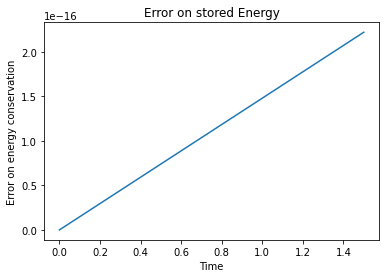

In [28]:
rpm.hp.plot_error_energy(solver, x, t)

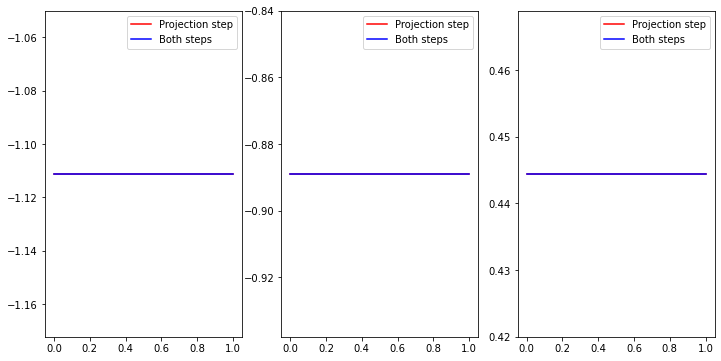

In [29]:
rpm.hp.plot_flows_trajectories(solver, dx_proj[0:40], dx_regul[0:40], N_points=50)